In [1]:
%load_ext autoreload
%autoreload 2

import model as m
import data_processing as dp
import feature_engineering as fe
import plotting as p

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_original = pd.read_csv('data/data_with_alpha_and_beta.csv')

Number of columns before filtering: 367


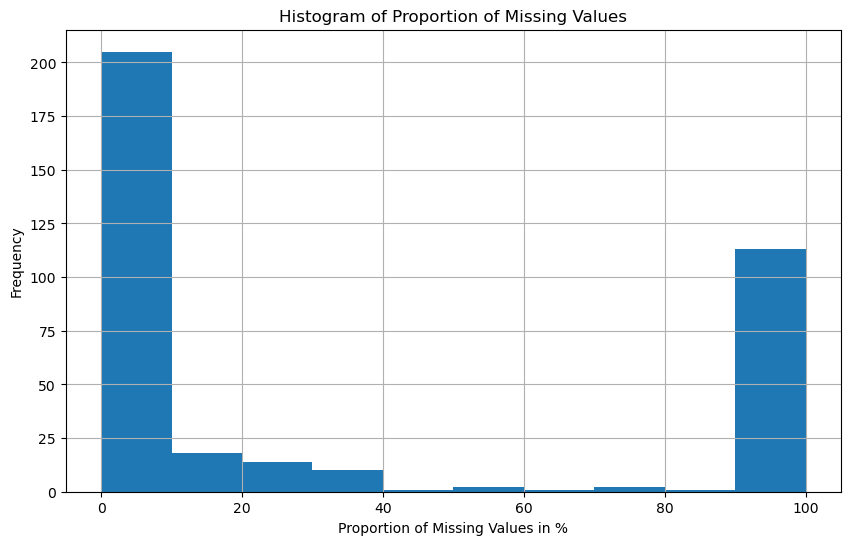

Number of columns after filtering: 202


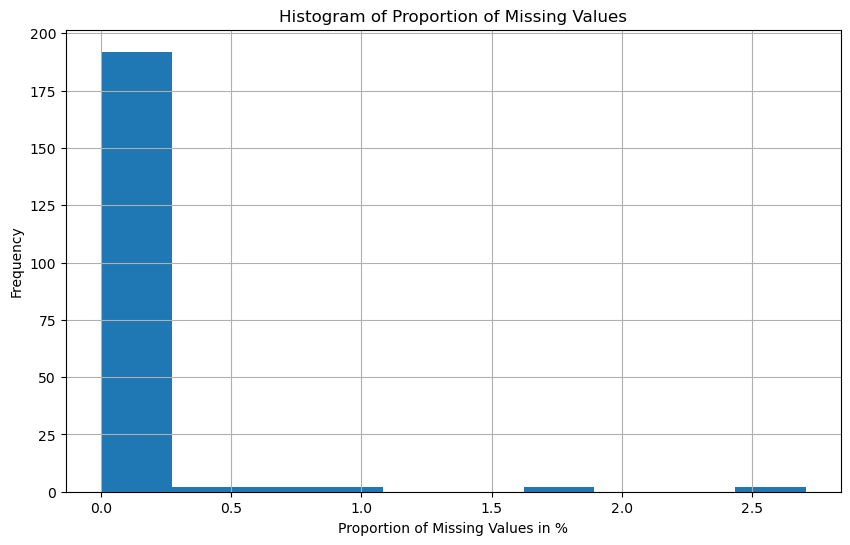

In [6]:
data = dp.data_preprocessing(data_original)
print("="*120)
print("Number of columns before filtering:", data.shape[1])
p.plot_missing_values(data)

data_filtered = dp.feature_filter(data)

print("="*120)
print("Number of columns after filtering:", data_filtered.shape[1])
p.plot_missing_values(data_filtered)

In [10]:
excluded = [item for item in data.columns if item not in data_filtered.columns]
len(excluded), excluded

(165,
 ['inventory',
  'avg_inventory',
  'quick_ratio',
  'interest_exp',
  'operating_income',
  'times_interest_earned',
  'inventory_turnover',
  'businessAcqDisposals_QOQ',
  'businessAcqDisposals_YOY',
  'businessAcqDisposals_3YOY',
  'payDiv_QOQ',
  'payDiv_YOY',
  'payDiv_3YOY',
  'ncfx_QOQ',
  'ncfx_YOY',
  'ncfx_3YOY',
  'nonControllingInterests_QOQ',
  'nonControllingInterests_YOY',
  'nonControllingInterests_3YOY',
  'shareswaDil_QOQ',
  'shareswaDil_3YOY',
  'prefDVDs_QOQ',
  'prefDVDs_YOY',
  'prefDVDs_3YOY',
  'intexp_QOQ',
  'intexp_YOY',
  'intexp_3YOY',
  'netIncDiscOps_QOQ',
  'netIncDiscOps_YOY',
  'netIncDiscOps_3YOY',
  'rnd_QOQ',
  'rnd_YOY',
  'rnd_3YOY',
  'deposits_QOQ',
  'deposits_YOY',
  'deposits_3YOY',
  'debtCurrent_YOY',
  'debtCurrent_3YOY',
  'investmentsNonCurrent_QOQ',
  'investmentsNonCurrent_YOY',
  'investmentsNonCurrent_3YOY',
  'taxLiabilities_QOQ',
  'taxLiabilities_YOY',
  'taxLiabilities_3YOY',
  'inventory_QOQ',
  'inventory_YOY',
  'invent

In [16]:
percentage_of_the_data = 0.1 # 0.1 for testing, save some time, change when needed
end = int(len(data) * percentage_of_the_data)


X = data.drop(['alpha', 'Ticker', 'sector'],axis=1)[:end] 
Y = data['alpha'][:end]

In [13]:
xgbt_model = m.XGBoostModel().fit(X, Y)